## Visualize results

In [ ]:
# import Pkg
# Pkg.activate("..")
# Pkg.instantiate()

  Activating project at `/home/synd/Wouter/Onderzoek/Projecten/tue/tgp-hopt-ar/hopt-bar`


In [10]:
using Revise
using Distributions
using LinearAlgebra
using JLD2
using Plots;
using TuePlots; 
theme(:default;
    TuePlots.get_plotsjl_theme_kwargs(
        TuePlots.SETTINGS[:ProbNum25];
        fontsize = true,
        figsize = true,
    )...)


In [11]:
# Number of repetitions
num_reps = 100

# Time settings
Δt = 0.1
len_times = 2 .^collect(3:10)
num_times = length(len_times)

# Preallocate result arrays
runtimes_MML = Matrix(undef, num_times, num_reps)
runtimes_HMC = Matrix(undef, num_times, num_reps)
runtimes_AR2 = Matrix(undef, num_times, num_reps)

# Collect results
for (nn,len_time) in enumerate(len_times)
    lt = lpad(len_time, 5, '0')

    res = load("results/runtimes-AR2-lentime$lt.jld2")
    runtimes_MML[nn,:] = res["runtimes_MML"]
    runtimes_AR2[nn,:] = res["runtimes_AR2"]
    # runtimes_HMC[nn,:] = res["runtimes_HMC"]
       
end

In [5]:
runtimes_MML[3,62] = missing

missing

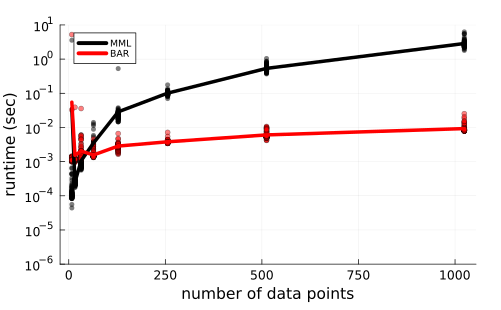

In [13]:
# with_theme(T) do
#     fig = Figure()
#     ax = Axis(fig[1, 1], xlabel = "number of data points", ylabel = "runtime (msec)")

#     sp = series!(ax, len_times, mean(times,dims=2)', ribbon=std(times,dims=2)')
#     # axislegend(ax)
#     # CairoMakie.ylims!(ax,-3,3)
#     hidespines!(ax, :t, :r)
#     save("figures/GPMat12_runtimes.pdf", fig, pt_per_unit = 1) # pt_per_unit is needed to ensure the correct sizes
# end

mruntimes_MML = [mean(skipmissing(runtimes_MML[k,:])) for k in 1:length(len_times)]
# mruntimes_HMC = [mean(skipmissing(runtimes_HMC[k,:])) for k in 1:length(len_times)]
mruntimes_AR2 = [mean(skipmissing(runtimes_AR2[k,:])) for k in 1:length(len_times)]

plot(xlabel="number of data points", ylabel="runtime (sec)", yscale=:log10, legend=:topleft)
# plot!(len_times, mean(times,dims=2), ribbon=std(times,dims=2)')
for (k,len_time) in enumerate(len_times)
    scatter!(len_time*ones(num_reps), runtimes_MML[k,:],  color="black", alpha=0.5, label="")
    # scatter!(len_time*ones(num_reps), runtimes_HMC[k,:],  color="blue", alpha=0.5, label="")
    scatter!(len_time*ones(num_reps), runtimes_AR2[k,:], color="red", alpha=0.5, label="")
end
plot!(len_times, mruntimes_MML, linewidth=5, color="black", alpha=1., label="MML", ylims=(0,1.), margin=20Plots.pt)
# plot!(len_times, mruntimes_HMC, linewidth=5, color="blue", alpha=1., label="HMC", ylims=(0,1.), margin=20Plots.pt)
plot!(len_times, mruntimes_AR2, linewidth=5, color="red", alpha=1., label="BAR", ylims=(0,1.), margin=20Plots.pt)
plot!(ylims=(1e-6,1e1), guidefontsize=15, tickfontsize=12)

In [14]:
savefig("figures/runtimes-sim-AR2.pdf")

"/home/synd/Wouter/Onderzoek/Projecten/tue/tgp-hopt-ar/hopt-bar/experiments/simulation/figures/runtimes-sim-AR2.pdf"